<h1><center><font color = "blue"> Decoding Kaggle Survey 2020 </font></center></h1>

" <b> Kaggle Machine Learning and Data Science Survey 2020 </b> " is an annual industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The survey was live for 3.5 weeks in October with 20,036 valid responses. Successfully this survey has been completed four times in a row for the welfare and growth of fast growing digital community across the globe. <br>
* With data being open-sourced by Kaggle, there's a lot to explore, learn and play. <br>
* The main objective of the dataset presented by Kaggle is to tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration.

<h1><center><font color = "green"> CONTENT </font></center></h1>
<p> <font color = "gray">
AGE Distribution -- GENDER Distribution -- COUNTRY Distribution and Analysis -- EDUCATIOANAL Qualifications Analysis 
-- JOB Roles Distribution -- Programming Languages -- Programming knowledge distribution  -- Experience vs Educational Qualifications -- World of Machine Learning -- Languages for Beginners -- JOB vs Gender -- Best Online Hosted Notebooks -- Most used IDEs -- Most used Programming Languages -- Primary Analytics Tool -- Most preferred Computing Platforms -- ML skills Distribution -- Most used ML algorithms -- Most popular ML Frameworks -- Company Size of Survey Respondents -- Best programming Language for Beginners

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
data = data.drop(0, axis=0)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. AGE Distribution of Survey Participants

<h3> What is your age (# years)? </h3>
The below graph shows the distribution of age groups of developers who particiapted in the Kaggle survey 2020.

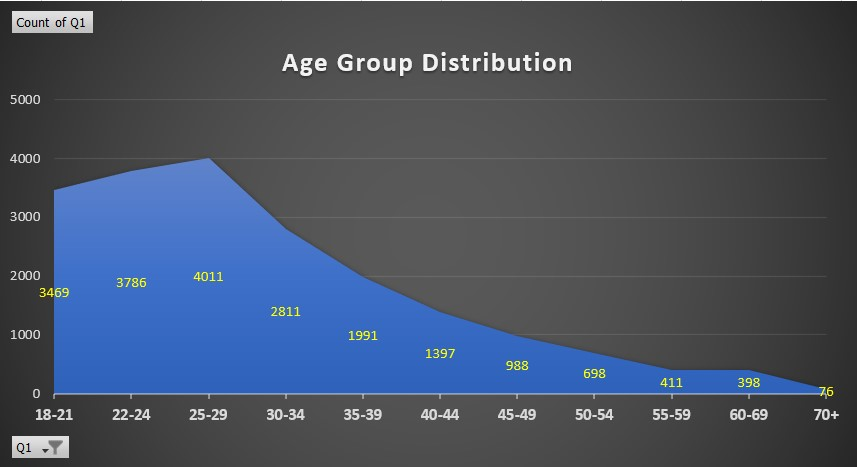

In [3]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/age_dist.jpg")

* The graph above shows how developers from different age groups responded to the survey. It can be clearly seen that developers in the  age groups 18 -29 lead the pack. 
* However,the chart clearly decreases upon going high on age. As age increases , count of survey respondents decreases. Thus, Count of people participating in the survey is <b>inversely proportional</b> to the Age group. 
* There is a clear decrease in slope, which is not healthy. This inturn, gives us the conclusion, that Kaggle 2020 survey is more <b>biased by responses from teenagers, freshers and entry-level professionals, rather than responses from professionals with industrial experience.</b>

In [4]:
class_distribution = data['Q1'].value_counts()
percent_of_surveryers_in_25_29 = class_distribution[0]/len(data['Q1'])*100
print(f'The 25-29 age group represent {round(percent_of_surveryers_in_25_29,2)} % of total kaggle surveyers.')
percent_of_surveryers_in_22_24 = class_distribution[1]/len(data['Q1'])*100
print(f'The 22-24 age group represent {round(percent_of_surveryers_in_22_24,2)} % of total kaggle surveyers.')

The 25-29 age group represent 20.02 % of total kaggle surveyers.
The 22-24 age group represent 18.9 % of total kaggle surveyers.


# 2. Gender Distribution 
* <h3>What is your gender?</h3>

In [5]:
data['Q2'].value_counts()

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

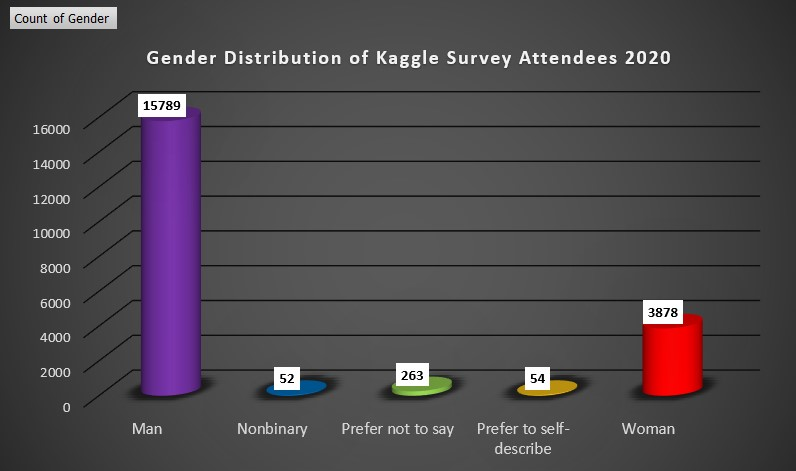

In [6]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/Gender_Distribution_2020Survey.jpg")

# 3. Country Distribution and Analysis
* **In which country do you currently reside?**

In [7]:
print('Participants from ' + str(len(data['Q3'].unique()))+ ' countries participated in the Kaggle Survey 2020')

Participants from 55 countries participated in the Kaggle Survey 2020


In [8]:
country = data.groupby(['Q3'])
df_country = country.agg('count')
df_country.reset_index(inplace=True)
df_country=df_country[['Q3', 'Q1']]
df_country.columns=('Country', 'Count')
df_country['year'] = 2020
#df_country.head()

# 4. Educational Qualifications of Survey Respondents

Frequency Table representing Counts of developers who have professional degrees.

In [9]:
data['Q4'].value_counts()

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

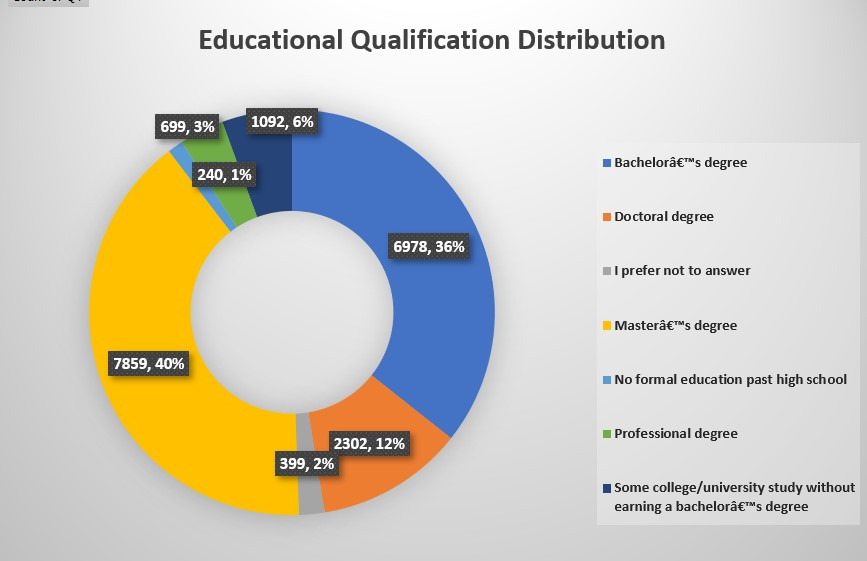

In [10]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/Educational Qualification.jpg")

* Developers with Master's Degree are more prominent along with Bachelor Degree holders.
* 7859 developers involved in the survey has Master's Degree and 6978 developers had Bachelors Degree.
* It is really Nice and strong to find 2302 developers in Kaggle Community with Doctoral Qualifications. This inturn, gives Kaggle a rich blend of talents. 
* There are also 240 developers with NO eductional or high school background.

# 5. Job Roles Distribution of Survey Respondents

Job roles of developers who participated in the Kaggle Survey 2020 are as follows:

In [11]:
employ_dist = data['Q5'].value_counts()
employ_dist

Student                      5171
Data Scientist               2676
Software Engineer            1968
Other                        1737
Currently not employed       1652
Data Analyst                 1475
Research Scientist           1174
Machine Learning Engineer    1082
Business Analyst              798
Product/Project Manager       692
Data Engineer                 437
Statistician                  290
DBA/Database Engineer         125
Name: Q5, dtype: int64

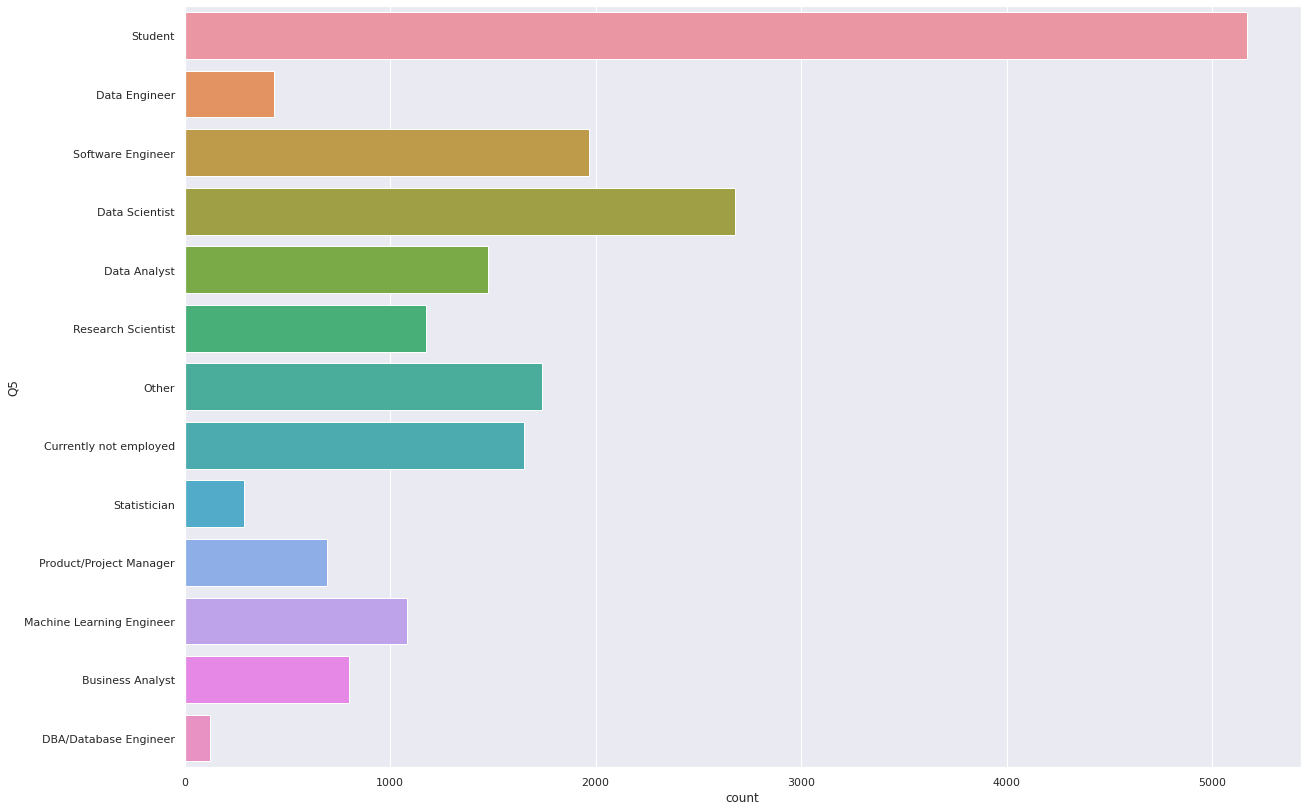

In [12]:
sns.set(rc={'figure.figsize':(20,14)})
sns.countplot(y =data['Q5'],data=data);

In [13]:
percent_of_Students = employ_dist[0]/len(data['Q5'])*100
print(f'Students represent {round(percent_of_Students,2)} % of total kaggle survey respondants.')
percent_of_Data_Scientist = employ_dist[1]/len(data['Q5'])*100
print(f'Data Scientists represent {round(percent_of_Data_Scientist,2)} % of total kaggle survey respondants.')
percent_of_unemployed = employ_dist[4]/len(data['Q5'])*100
print(f'Users who are not currently employed represents {round(percent_of_unemployed,2)} % of total kaggle survey respondants.')

Students represent 25.81 % of total kaggle survey respondants.
Data Scientists represent 13.36 % of total kaggle survey respondants.
Users who are not currently employed represents 8.25 % of total kaggle survey respondants.


# 6. Programming Distribution

Kaggle 2020 Survey is for understanding the growth and position of Data Science and Machine Learning in the modern ages. Hence, Programming, which is the base for any software development, is the most important skill-set. Below is the description and visualization of programming skills of survey respondants with their number of experience in Programming.

In [14]:
exp_dist = data['Q6'].value_counts()
print(exp_dist)

3-5 years                    4546
1-2 years                    4505
< 1 years                    3313
5-10 years                   2552
10-20 years                  1751
20+ years                    1329
I have never written code    1124
Name: Q6, dtype: int64


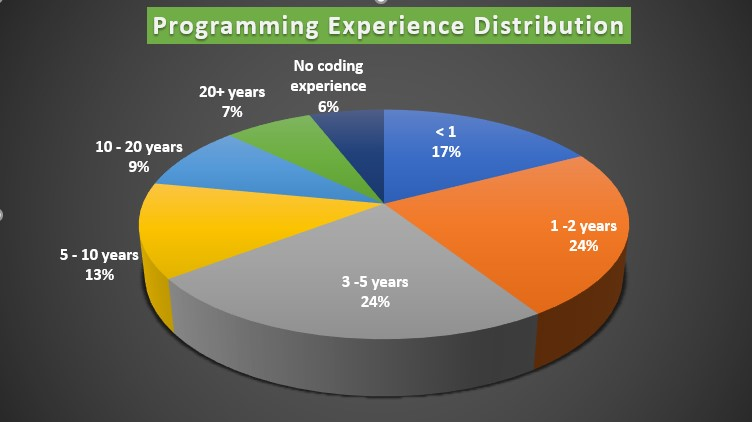

In [15]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/programmingexp.jpg")

In [16]:
percent_of_20plus = exp_dist[5]/len(data['Q6'])*100
print(f'Survey Respondents with 20+ years of programming experience represent {round(percent_of_20plus,2)} % of total kaggle survey respondants.')
percent_of_3_5 = exp_dist[0]/len(data['Q5'])*100
print(f'Survey Respondants with 3-5 years of programming experience represent {round(percent_of_3_5,2)} % of total kaggle survey respondants.')
percent_of_nocode = exp_dist[6]/len(data['Q5'])*100
print(f'Users who are not currently employed represents {round(percent_of_nocode,2)} % of total kaggle survey respondants.')

Survey Respondents with 20+ years of programming experience represent 6.63 % of total kaggle survey respondants.
Survey Respondants with 3-5 years of programming experience represent 22.69 % of total kaggle survey respondants.
Users who are not currently employed represents 5.61 % of total kaggle survey respondants.


# 7. Mapping between Experience and Educational Qualifications

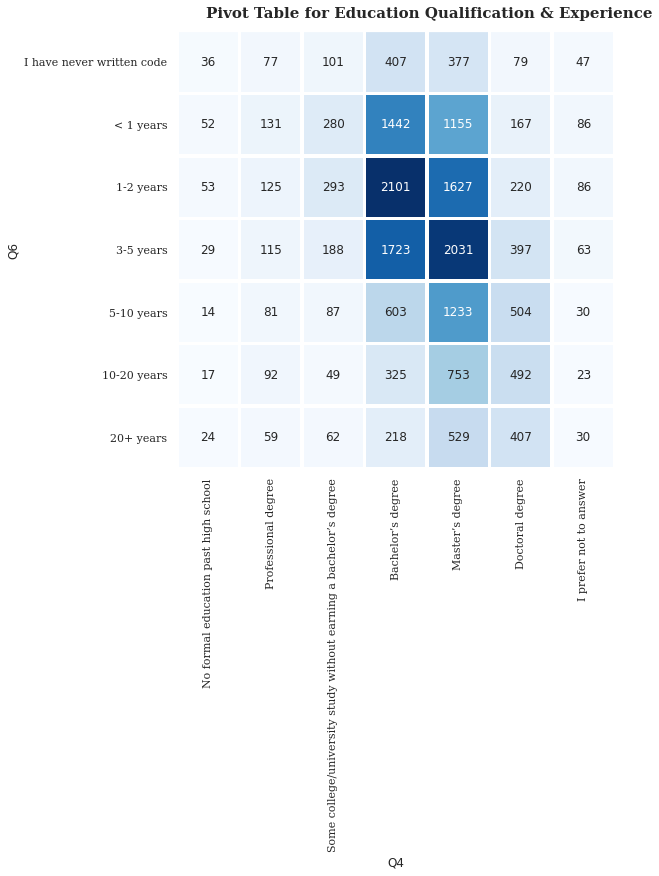

In [17]:
q6_order = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
q4_order = [
    'No formal education past high school',
    'Professional degree',
    'Some college/university study without earning a bachelor’s degree',
    'Bachelor’s degree',
    'Master’s degree',
    'Doctoral degree',
    'I prefer not to answer']
data['count'] = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
sns.heatmap(pd.pivot_table(data, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum).loc[q6_order, q4_order], 
            cmap="Blues",
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax,
            annot=True,
            fmt="d"
           )

ax.spines['top'].set_visible(True)

fig.text(0.36, 1, 'Pivot Table for Education Qualification & Experience', fontweight='bold', fontfamily='serif', fontsize=15)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

plt.tight_layout()
plt.show()

# 8. Machine Learning Experience of Kaggle Survey Respondents
<br>
Data Science is not all about building predictive models using Machine Learning. Yet, ML is one of the most recommended skill-sets to break into the field of Data Science. Companies now a days, prefer to hire developers with atleast basic knowledge of ML development.
Here is the graph that shows the ML Experience of Kaggle Survey respondants.

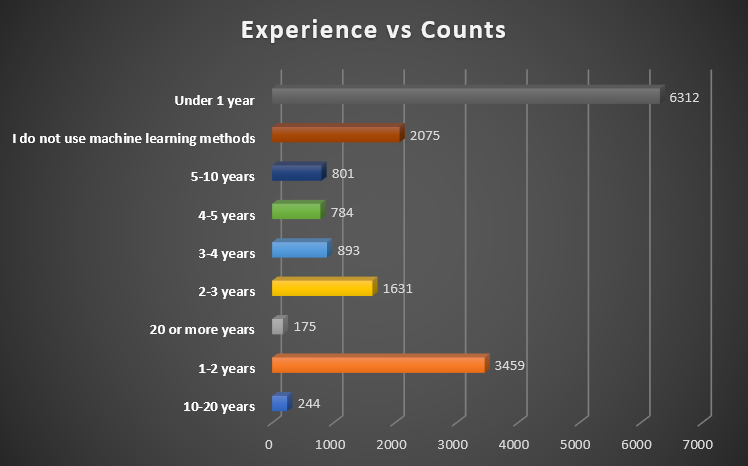

In [18]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/Kaggle_Survey_MLEngg.png")

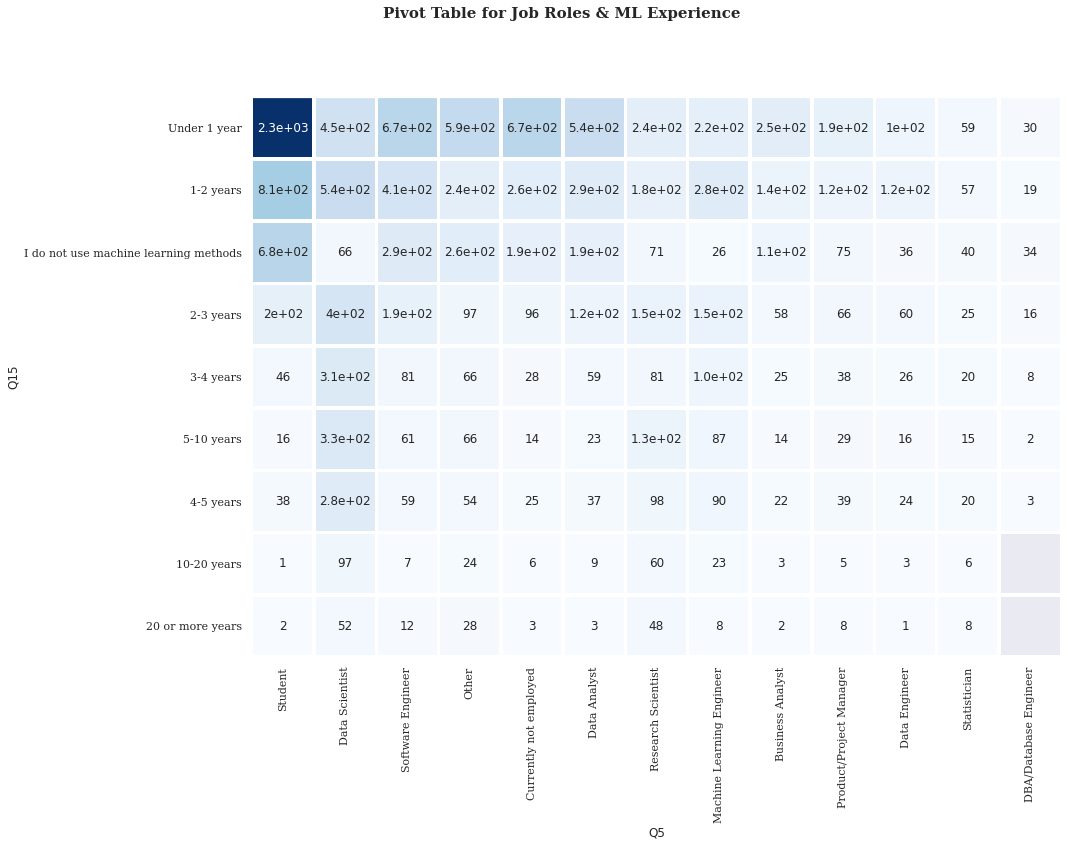

In [19]:
q6_order = ['Under 1 year','1-2 years','I do not use machine learning methods','2-3 years','3-4 years','5-10 years','4-5 years','10-20 years', '20 or more years']
q4_order = [
    'Student',
    'Data Scientist',
    'Software Engineer',
    'Other',
    'Currently not employed',
    'Data Analyst',
    'Research Scientist','Machine Learning Engineer','Business Analyst','Product/Project Manager','Data Engineer','Statistician','DBA/Database Engineer']
data['count'] = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
sns.heatmap(pd.pivot_table(data, values='count', index=['Q15'], columns=['Q5'], aggfunc=np.sum).loc[q6_order, q4_order], 
            cmap="Blues",
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax,
            annot=True
           )

ax.spines['top'].set_visible(True)

fig.text(0.36, 1, 'Pivot Table for Job Roles & ML Experience', fontweight='bold', fontfamily='serif', fontsize=15)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

plt.tight_layout()
plt.show()

* Most of the developers who took part in Survey has less than two years experience in Machine Learning.
* Also, the clearly indicates that most of the professionals and students have jut started to learn ML (with less than 1 year experience).
* Data Scientist and Research Scientist are job profiles that have 20+ years of experience in ML. Thus indicating thier work nature and skill-sets.Out of 175 developers who have 20+ years of experience in ML, 100 belongs to Data and Research Scientists.
* It is interesting that most of the students, Business Analysts and Data Analysts do not use ML technology.
* It is astonishing to find 26 Machine Learning Engineers who do not use Machine Learning. Hope it's a typeo. 
* <font color="red"> 172 Developers </font> with ML skills of >= 2 years of experience are <font color="red"><b> Unemployed </b></font>, which is really alarming.

# 9. Language for Beginners in Data Science -- Recommended by Kagglers

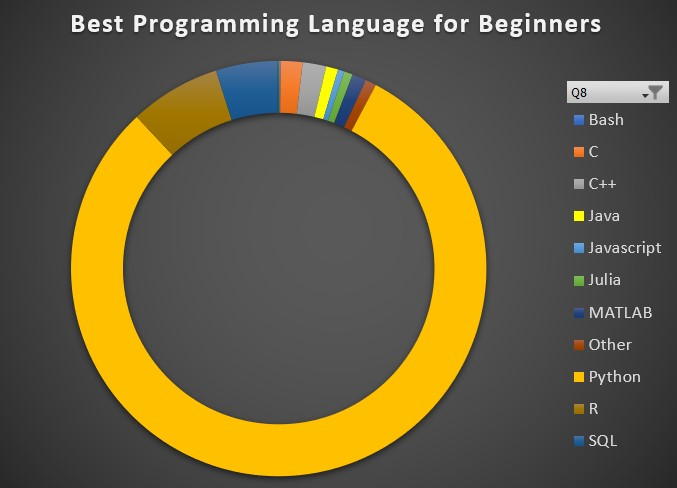

In [20]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/beststarter.jpg")

In [21]:
fav_lan = data['Q8'].value_counts()
#print(fav_lan)
rec_lang1 = fav_lan[0]/len(data['Q8'])*100
print(f'>> {round(rec_lang1,2)} % of the Kaggle Community has recommended to learn Python first when being a novice or starter.')
rec_lang2 = fav_lan[1]/len(data['Q8'])*100
print(f'>> {round(rec_lang2,2)} % of the Kaggle Community has recommended to learn R first when starting on.')

>> 71.08 % of the Kaggle Community has recommended to learn Python first when being a novice or starter.
>> 6.28 % of the Kaggle Community has recommended to learn R first when starting on.


# 10. Counts of Job Roles with Gender distribution

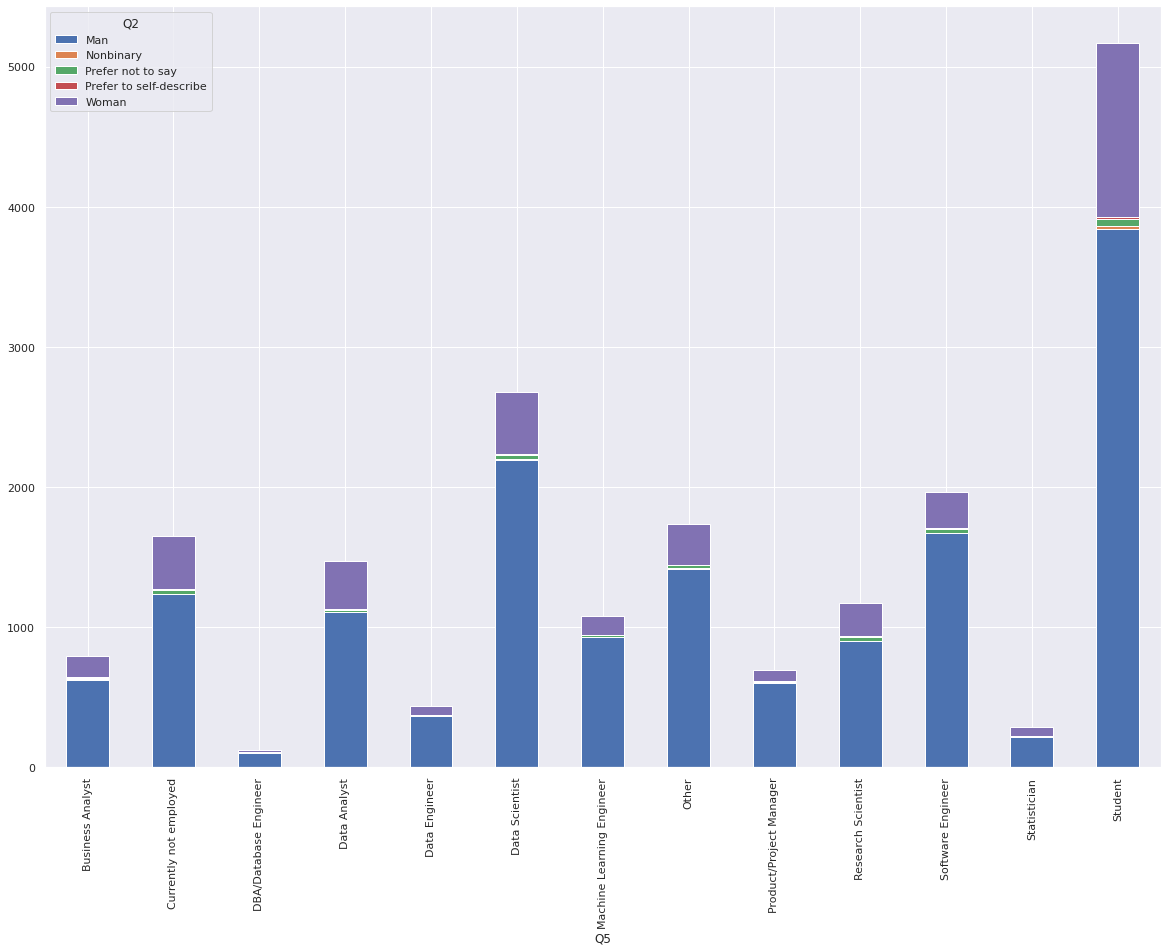

In [22]:
data.groupby(['Q5','Q2']).size().unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (4, 8)
plt.show()

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = data.groupby(['Q2','Q5']).sum()
df

count
Q2                      Q5                              
Man                     Business Analyst             627
                        Currently not employed      1235
                        DBA/Database Engineer        103
                        Data Analyst                1110
                        Data Engineer                369
                        Data Scientist              2194
                        Machine Learning Engineer    928
                        Other                       1418
                        Product/Project Manager      603
                        Research Scientist           899
                        Software Engineer           1670
                        Statistician                 219
                        Student                     3843
Nonbinary               Business Analyst               3
                        Currently not employed         4
                        DBA/Database Engineer          2
                        Data Analyst                   1
                        Data Scientist                 8
                        Other                          2
                        Product/Project Manager        1
                        Research Scientist             4
                        Software Engineer              4
                        Statistician                   1
                        Student                       18
Prefer not to say       Business Analyst              11
                        Currently not employed        30
                        DBA/Database Engineer          4
                        Data Analyst                  11
                        Data Engineer                  7
                        Data Scientist                28
                        Machine Learning Engineer     14
                        Other                         21
                        Product/Project Manager        8
                        Research Scientist            30
                        Software Engineer             28
                        Statistician                   1
                        Student                       52
Prefer to self-describe Business Analyst               1
                        Currently not employed         7
                        Data Analyst                   5
                        Data Engineer                  1
                        Data Scientist                 8
                        Machine Learning Engineer      4
                        Other                          4
                        Product/Project Manager        2
                        Research Scientist             2
                        Software Engineer              6
                        Student                       13
Woman                   Business Analyst             156
                        Currently not employed       376
                        DBA/Database Engineer         16
                        Data Analyst                 348
                        Data Engineer                 60
                        Data Scientist               438
                        Machine Learning Engineer    136
                        Other                        292
                        Product/Project Manager       78
                        Research Scientist           239
                        Software Engineer            260
                        Statistician                  69
                        Student                     1245

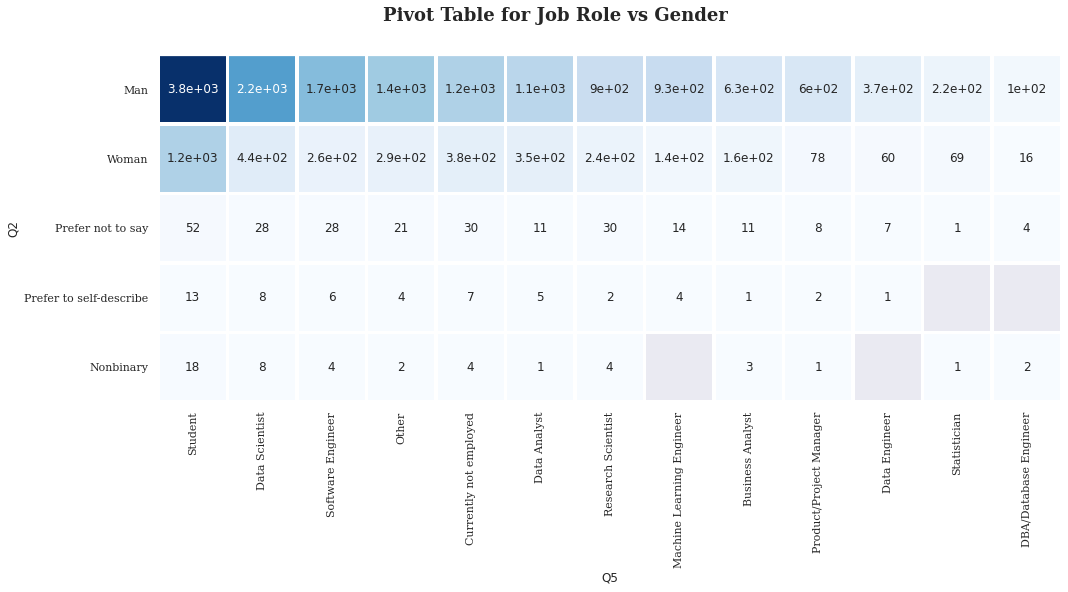

In [24]:
q6_order = ['Student', 'Data Scientist', 'Software Engineer', 'Other', 'Currently not employed', 'Data Analyst', 'Research Scientist',
            'Machine Learning Engineer','Business Analyst','Product/Project Manager','Data Engineer','Statistician','DBA/Database Engineer']
q4_order = ['Man','Woman','Prefer not to say','Prefer to self-describe','Nonbinary']
data['count'] = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
sns.heatmap(pd.pivot_table(data, values='count', index=['Q2'], columns=['Q5'], aggfunc=np.sum).loc[q4_order, q6_order], 
            cmap="Blues",
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax,
            annot=True
           )

ax.spines['top'].set_visible(True)

fig.text(0.36, 0.75, 'Pivot Table for Job Role vs Gender', fontweight='bold', fontfamily='serif', fontsize=18)   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

plt.tight_layout()
plt.show()

# 11. Online Hosted Notebooks for Programming -- Usage Stats
* Which of the following hosted notebooks products do you use on a regular basis?  

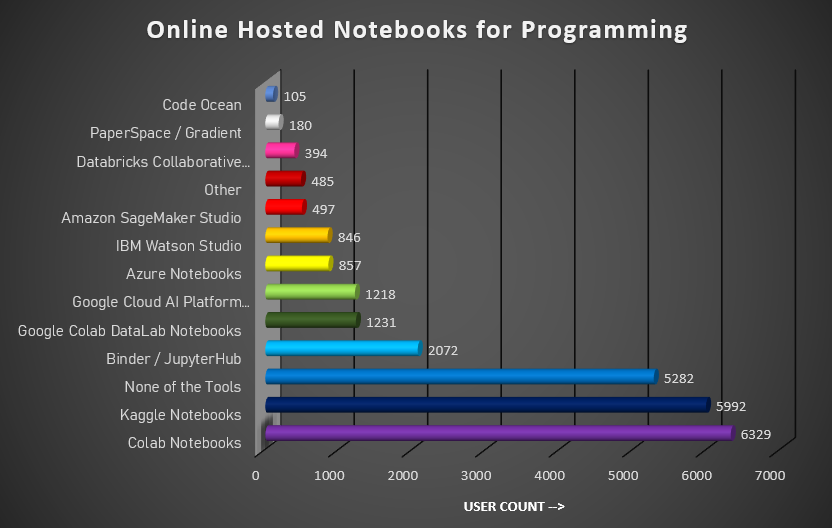

In [25]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/Hosted_NBKs.png")

* Congratulations  <b> GOOGLE </b> !! Both Colab and Kaggle Notebooks from Kaggle (subsidiary of Google LLC) are the Top rated Online Hosted Notebooks for Programming.
* However, Colab Notebooks leads the race.
* When it comes to Tech Giants it is undoubtedly <b> GOOGLE </b>. 
* Colab, Kaggle Notebooks, Google Colab DataLab, and Google Cloud AI Platform are in Top Five Products.
* Azure Notebooks from Microsoft, AWS from Amazon, IBM Watson Studio from IBM are behind Google Products and are in the race.

# 12. Intergrated Development Environments (IDE) -- Usage Stats
* Which of the following Integrated Development Environments (IDE's) do you use on a regular basis

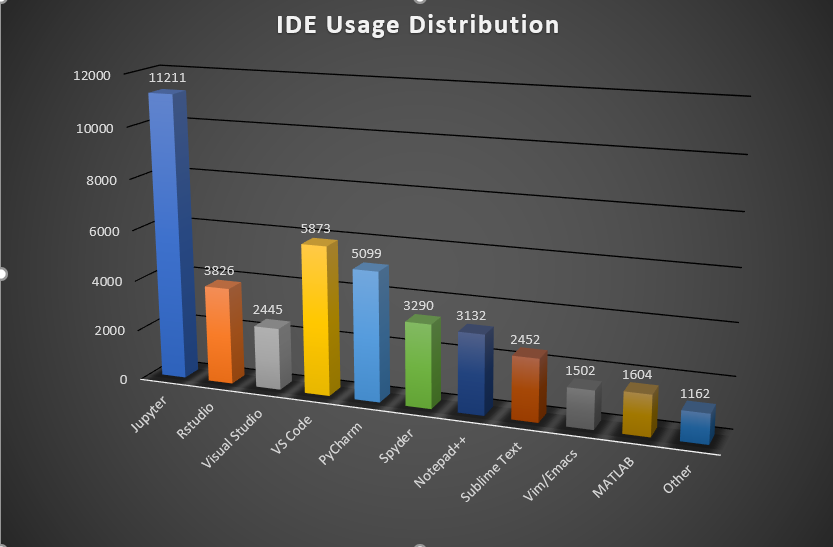

In [26]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/IDEdist.png")

* <font color="green"> <b>  Jupyter Notebooks </b> </font> is the mostly used Integrated Development Environment undoubtedly.
*  <font color="blue"> <b>  VSCode </b> </font > and <font color="pink"> <b> PyCharm </b> </font> are the next highly used IDEs.

# 13. Best Programming Languages by Survey Respondants

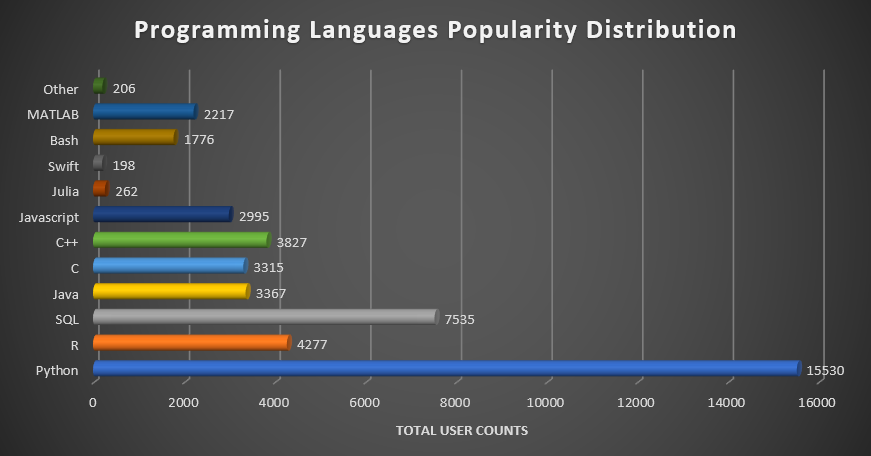

In [27]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/Language_Popularity_2020_kagle.png")

* <b> <mark> Python </mark></b>  is the most Used and Popular Programming, as voted by Kaggle Survey attendees.
* Followed by python are <b> <mark> SQL </mark></b>,<b><mark>R</mark></b> for Data Science applications.
* Surprise entries are C, C++, Java and Javascript for Data Science. Though, data science is language independent yet with comparatively lesser support it is still being preferred by most people around the world.

# 14. Primary Data Analytics Tools -- User Stats

Development Tools are like girl friends. You can have 'n' numbers of it, but only one among them is going to be your favorite. In such good idealogy, let's see what our kaggle community has said about their favorite tools for development in Data Science and Machine Learning.

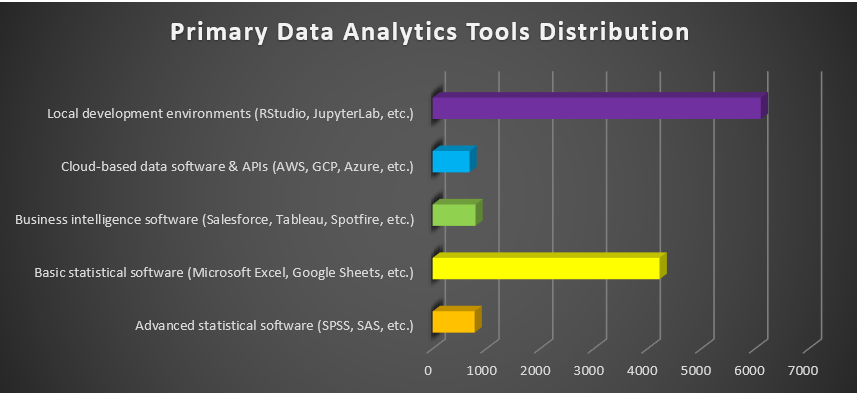

In [28]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/Primary_tools.png")

* Most of the Surveyers prefer to use <span style="background-color:#2AEACC"> <font color = "black"> Local Development Environments </font></span> for their tasks. 
* Local Development tools includes JupyterLab, RStudio, VSCode etc.
* Next to which, people prefer to use Basic Statistical Softwares like Microsoft Excel, Google Sheets and many more.
* The Most astonishing is that, <b> Cloud-based Data Softwares & APIs </b> with least votes. It was seen that Jupyter Notebooks received the most votes as best and most widely used IDEs. Yet, here it is least rated. Our Assumptions contradicts a lot here.

# 15. Most preferred Computing Platform

Below is the graph showing the visualization of Computing Platform hardwares used by survey respondants. It depicts the most preferred Computing platform amongst Personal computer or laptop, Cloud Computing Platforms like AWS, Azure, GCP,and Deep Learning Work Stations like NVIDIA GPUs, LambdaLabs etc.

In [29]:
data['Q11'].value_counts()

A personal computer or laptop                                          13348
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)     2358
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)                834
None                                                                     292
Other                                                                    197
Name: Q11, dtype: int64

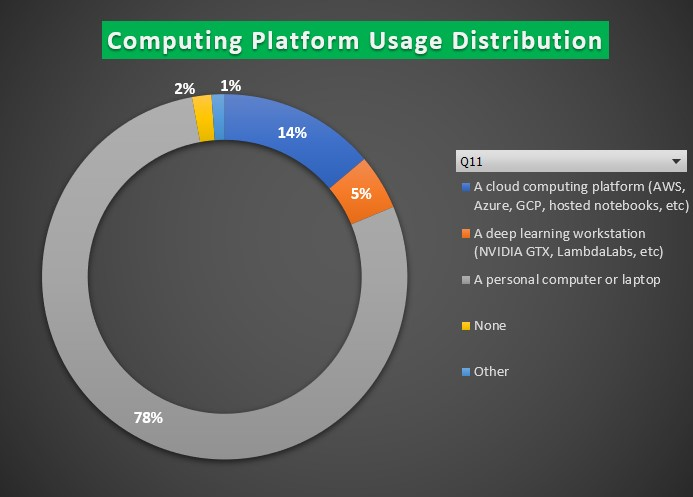

In [30]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/computingusage.jpg")

* Kaggle respondents and users prefer a <span style="background-color:#2AEACC"> <font color = "black">Personal Computer or Laptop </font></span> for their development. Some of the reasons can be usage of highly secure datasets and privacy needs.
* Though there are chances for developers to rent a virtual machine or notebooks with GPUs, still they are using Deep Learning workstation. It can also add to assumption that they may have invested for future long time development support.
* So, the future prediction is Cloud Service Providers for Notebooks vs GPU/ TPU Accelerators for Hardware support, though Cloud services use these hardwares only. 
* Currently people invest more on Personal Computers and Laptops with optimal computing resources. Watch out for <mark>Dell, Lenova and other laptop manufacturers </mark> investing in powerful Computuational Hardwares like GPUs, TPUs and much more to be embedded into their products <mark>after seeing this Kaggle Survey 2020</mark>.

# 16. Machine Learning Skill vs Survey Respondents Experience

The below graph shows the Machine Learning experience of kaggle 2020 survey  respondents.

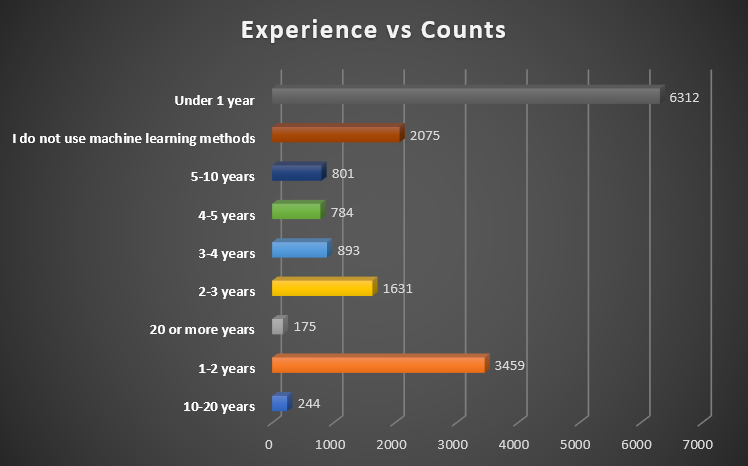

In [31]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/Kaggle_Survey_MLEngg.png")

* Most of the developers have Less than 1 year of experience using Machine Learning.
* However, 2075 (roughly 1/10th of the survey attendees)have not used ML so far.
* It is really good to see 175 developers with experience of 20 or more years took part in the survey 2020.

# 17. Most Used Machine Learning Algorithms

There are 'n' number of algorithms and methods used in the field of Machine Learning. However,certain algorithms are highly used due to its simplicity, performance, and ability to generalize better on unseen data. Here is the list of ML algorithms.

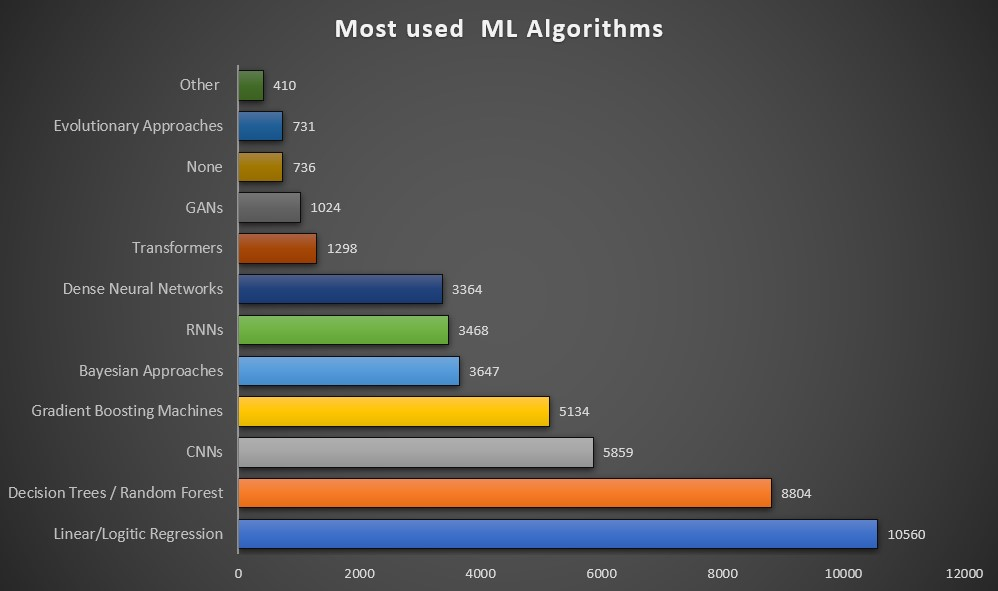

In [32]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/MostUsedML.jpg")

* Speaking with respect to Visuals above, Linear models like Linear/Logistic Regression are the most used algorithm as per user responses. They are simple yet work best when there is linear relationship between independent and dependent variables.
* Next is the race are a combination of Tree based algorithms and Ensemble algorithms such as Decision Trees, and Random Forest algorithms respectively.
* Though there are complex algorithms like GANs, Transformers, BERT in the race, yet simple linear and tree based models won the competition w.r.t survey respondents.

# 18. Most Popular Machine Learning Frameworks

* <mark> Scikit Learn </mark> or sklearn is by far voted the mostly used Machine Learning framework.
* Next in the race are <mark> TensorFlow from Google </mark> and <mark>Keras</mark> from keras.io respectively.
* PyTorch and Prophet from Facebook are also some of the top voted frameworks.

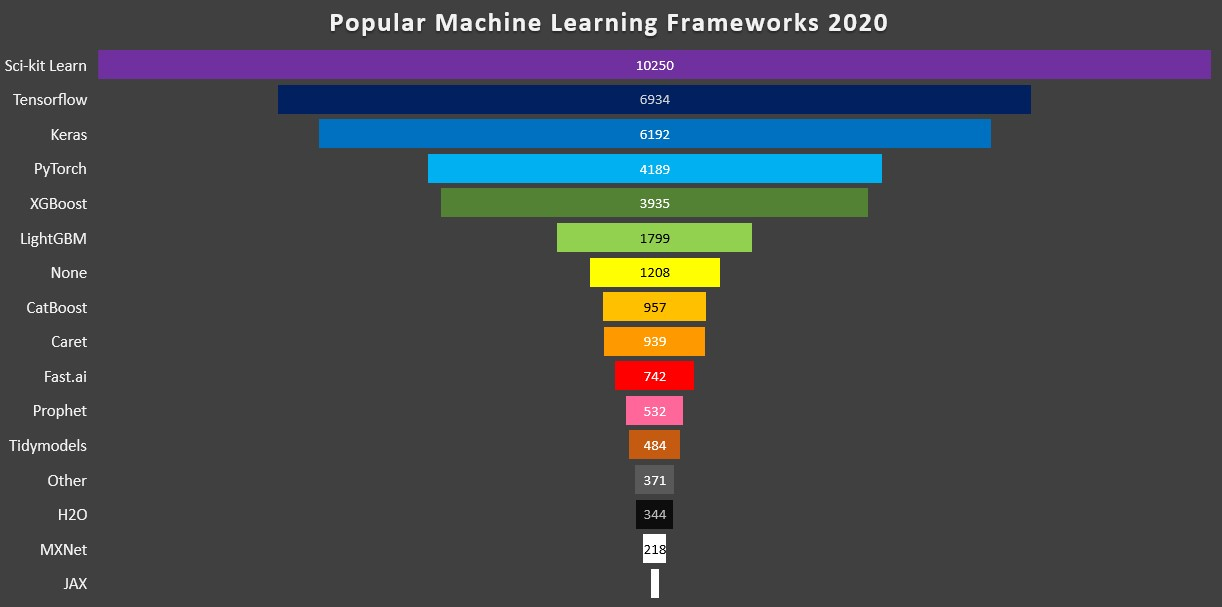

In [33]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/MLFrameworks.jpg")

# 19. Size of Company -- of survey respondents 

The Kaggle Survey 2020 is attended by numerous users with numerous backgrounds. However, they work for different organisations with different teams. Hence, here is the Company size of Survey Respondents with respect to working employees size.

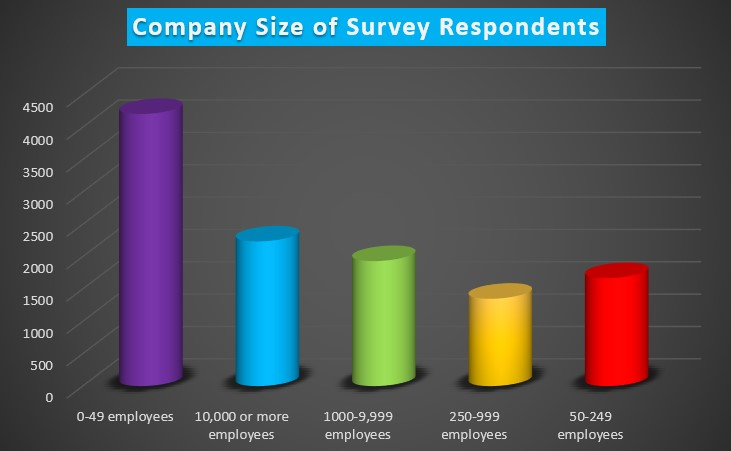

In [34]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/companysize.jpg")

* Most of the survey respondants work for companies that have a total strength of 0-49 employees.
* Next in the pack is companies with 10,00 or more employees. Hope they are tech giants or product based company.

# 20. Best Programming Languages for Beginners

* Ubdoubtedly, it is <font color='green'> <b>Python</b></font> ,which wins the race for <b> Best Programming language for Beginners </b>. 
* Kaggle Survey attendees represents a rich blend of students, freshers, and experienced. Hence, most of them going with Python can be use its dynamic nature, community support, cross-platform nature, open-source (unlike MATLAB which is paid) and has lots of applications including Data Science, Machine Learning, Web development, API development, Backend development and even Blokchain technology.
* Also, there are lots of free tutorials for learning <b>python </b> in MOOCs, YouTube,and Private Blogs.

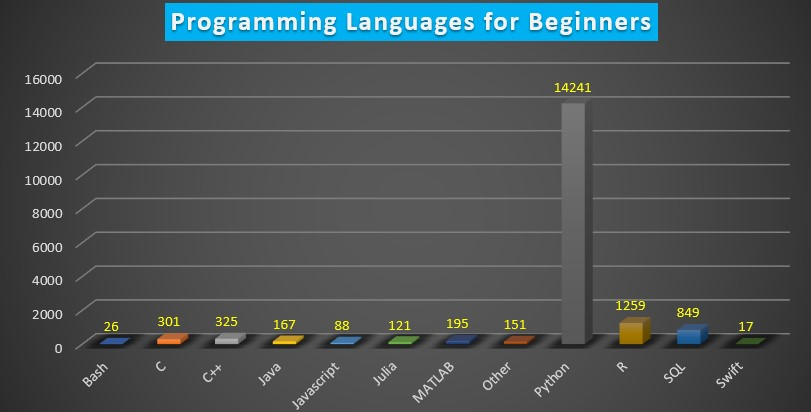

In [35]:
from IPython.display import Image
Image("../input/myexcelviz/Viz_graphs/programmingexp1.jpg")

<h3> Congratulations <font color ="Green"> <b>Python Software Foundation</b></font> and <font color="Red"> Mr. Guido Van Rossum !! </font></h3>
<br>
Python has single-handedly been adjudged the winner and most preferred language for Beginners. Thanks for making it simple.

# Era of Cloud Computing
<font color="Red">Which Tech Giant Leads the race ?? </font>

* It is undoubtedly <font color="red">AWS </font>(Amazon Web Services) from Amazon.com that leads the race with <font color="green"> GCP </font> from Google and <font color="blue"> Azure </font> from Microsoft taking the next 2 positions.
* However, the Growth of Google to second position from Bottom of the table is a marvelous feat and especially overtaking Microsoft's Azure is highly indicating its dominancy in market.

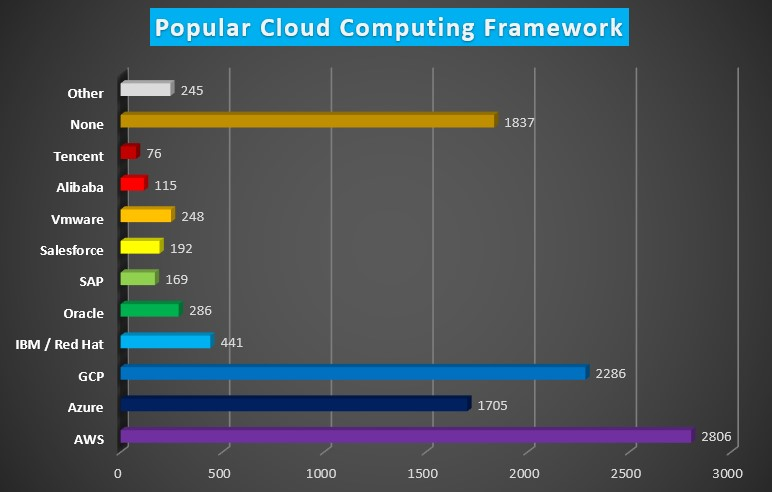

In [36]:
Image("../input/myexcelviz/Viz_graphs/Cloud_Computing.jpg")

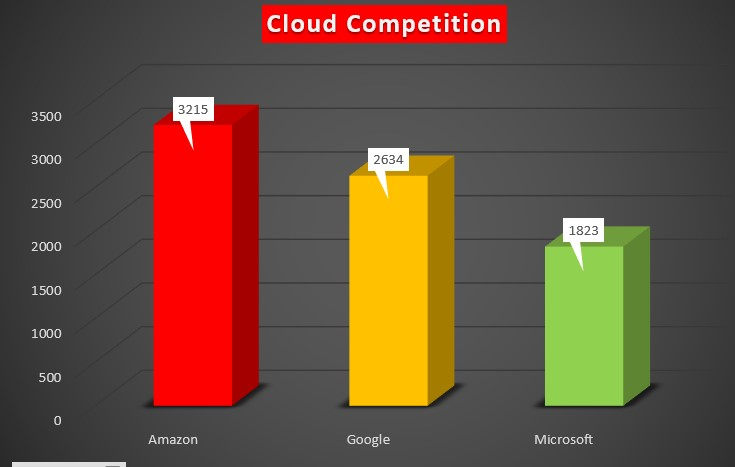

In [37]:
Image('../input/myexcelviz/Viz_graphs/Cloud_Competition.jpg')

# Machine Learning on Cloud
* Rise of Google Cloud AI Platform. 
* Zero to Hero Transition

* Google Cloud AI platform is the most used ML product on Cloud along with AWS SageMaker and Azure ML Studio.
* Though, Amazon leads the Most used and most popular Cloud Computing platform, yet when it comes to Machine Learning it is Google products that is leading the race by a larger margin from its prime contenders.

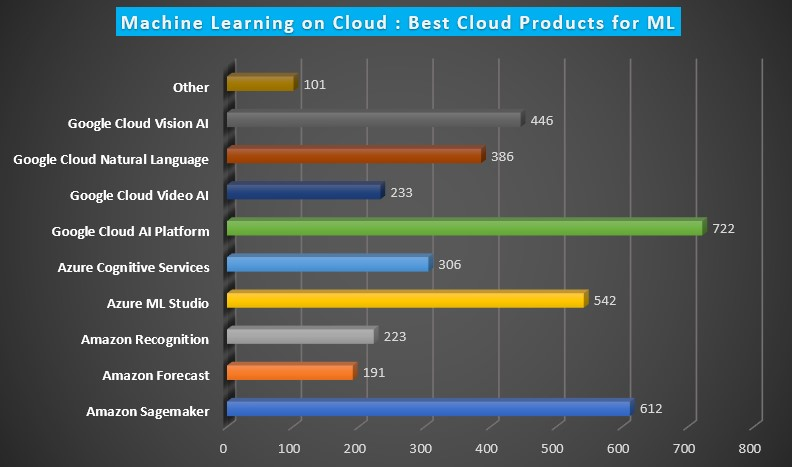

In [38]:
Image('../input/myexcelviz/Viz_graphs/ML_Cloud.jpg')

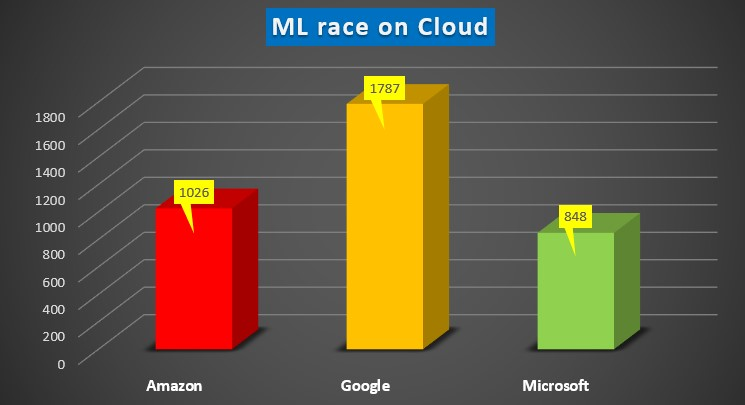

In [39]:
Image('../input/myexcelviz/Viz_graphs/MLraceoncloud.jpg')

# Thank you All for investing your time for reading my kernel. Have a Nice day !!
<br>
<h3> Kindly show your support in the form of <font color="red">UPVOTES</font> and <font color="red">FEEDBACKS</font> !! </h3>